***Plot lines and find distances between lines***

Finds the shortest distance between lines defined paramentrically: 
$$ \vec r_1 = \vec {r_{01}} + \vec {v_1} t$$
$$ \vec r_2 = \vec {r_{02}} + \vec {v_2} p$$

This can be viewed as a multivariate extremum problem:
$$\frac {\partial \|\vec {r_1}(t) - \vec {r_2}(p)\|} {\partial t} = 0$$
$$\frac {\partial \|\vec {r_1}(t) - \vec {r_2}(p)\|} {\partial p} = 0$$

The values of parameters at which minimum distance is obtained:
$$t_{min} = \frac {(\vec r_{01}-\vec r_{02})\cdot\vec v_1 \|\vec v_2\|^2 - (\vec v_1\cdot\vec v_2)(\vec r_{01}-\vec r_{02})\cdot\vec v_2} {D}$$
$$p_{min} = \frac {(\vec r_{01}-\vec r_{02})\cdot\vec v_1 (\vec v_1\cdot\vec v_2) - (\vec r_{01}-\vec r_{02})\cdot\vec v_2 \|\vec v_1\|^2} {D}$$
$$ D = (\vec v_1\cdot\vec v_2)^2 - \|\vec v_2\|^2\|\vec v_1\|^2$$

The closest points on $L_1$ and $L_2$ are correspondingly: 
$$\vec r_{1_{min}} = \vec {r_{01}} + \vec {v_1} t_{min}$$
$$\vec r_{2_{min}} = \vec {r_{02}} + \vec {v_2} p_{min}$$

Distance between lines = 4.740201166731856
Points of minimum distance: [-4.1679198  -2.22389307 -0.77610693], [-1.42773601 -0.71679198  2.786132  ]


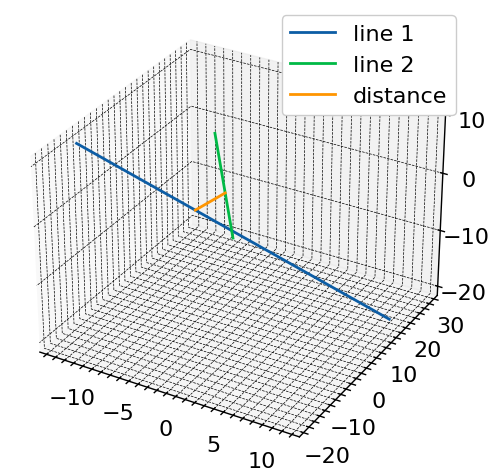

In [31]:
import numpy as np
import matplotlib.pyplot as plt

import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

from matplotlib import animation
from matplotlib.animation import PillowWriter

v1 = np.array([3,4,-4])
v2 = np.array([2,-6,1])

r01 = np.array([2,6,-9])
r02 = np.array([-1,-2,3])


fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

# Prepare arrays x, y, z

# Parameter values, 2 is enough to plot a line
t = np.linspace(-5, 3, 2)

x = r01[0] + v1[0]*t
y = r01[1] + v1[1]*t
z = r01[2] + v1[2]*t
ax.plot(x, y, z, label='line 1')

x = r02[0] + v2[0]*t
y = r02[1] + v2[1]*t
z = r02[2] + v2[2]*t
ax.plot(x, y, z, label='line 2')


del_r0 = r01 - r02
v1_dot_v1 = np.dot(v1,v1)
v2_dot_v2 = np.dot(v2,v2)
v1_dot_v2 = np.dot(v1,v2)
v1_dot_del_r0 = np.dot(v1, del_r0)
v2_dot_del_r0 = np.dot(v2, del_r0)


D = (v1_dot_v2**2 - v1_dot_v1*v2_dot_v2)

t_min_dist = 1/D * (v1_dot_del_r0*v2_dot_v2 - v1_dot_v2*v2_dot_del_r0)
p_min_dist = 1/D * (v1_dot_del_r0*v1_dot_v2 - v2_dot_del_r0*v1_dot_v1)

r1_min_dist = r01 + v1*t_min_dist
r2_min_dist = r02 + v2*p_min_dist

d_vec = r1_min_dist - r2_min_dist
distance = np.sqrt(np.dot(d_vec, d_vec))

print(f'Distance between lines = {distance}')
print(f'Points of minimum distance: {r1_min_dist}, {r2_min_dist}')

ax.plot(*zip(r1_min_dist, r2_min_dist), label='distance')


ax.legend()
plt.show()


def animate(i):
    ax.view_init(elev=10, azim=40/np.pi*i)


ani = animation.FuncAnimation(fig, animate, frames=np.linspace(0,2*np.pi,10))
ani.save('images/lines_3D.gif', writer='pillow', dpi=200, fps=5)